In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_grid( min, max, num ):
    
    cell_borders = np.linspace(min,max,num)
    
    def pos_in_grid(val):
        pos = sum( [1 if x <= val else 0 for x in cell_borders[1:-1] ] )
        return pos
    
    return pos_in_grid


def data_2_grid( filename,x_min, x_max, y_min, y_max, res_x, res_y ):

    with open(filename, "r") as fp:
        x_data, y_data = np.loadtxt(fp, delimiter=' ', usecols=(0,1), unpack = True)

    pos_in_x_grid = generate_grid(x_min, x_max, res_x+1)
    pos_in_y_grid = generate_grid(y_min, y_max, res_y+1)

    grid = np.zeros((res_x, res_y))

    for x,y in zip(x_data, y_data):
        j = pos_in_x_grid(x)
        i = pos_in_y_grid(y)
        
        grid[i][j] += 1

    return grid

In [4]:
with open("example_001.csv","r") as fp:
	x_data, y_data = np.loadtxt(fp, delimiter=' ', usecols=(0,1), unpack = True)

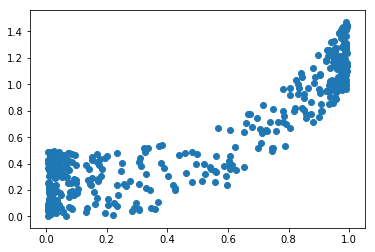

In [5]:
plt.scatter(x_data, y_data, marker = 'o')

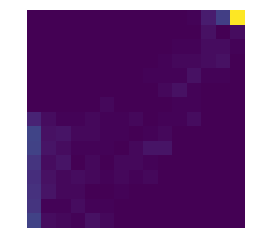

In [6]:
grid = data_2_grid("example_001.csv",0,1,0,1,15,15)

fig, ax = plt.subplots()
ax.set_axis_off()
ax.imshow(grid, origin='lower')
ax.margins(0,0)


fig.savefig("myfig.png", format="png", bbox_inches='tight')

51.0
0.0


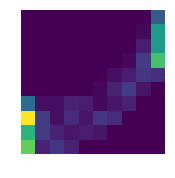

In [7]:
grid = data_2_grid("example_001.csv",0,1,0,1.5,10,10)

print(np.max(grid))
print(np.min(grid))

fig = plt.figure(frameon = False)
fig.set_size_inches(2,2)
ax = plt.Axes(fig, [0,0,1,1])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(grid,  origin='lower')
fig.savefig("heatmap.png")

In [8]:
grid = [ [ 0 if val == 0 else np.log(val)  for val in row ]    for row in grid ]

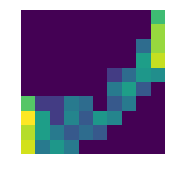

In [9]:
fig = plt.figure(frameon = False)
fig.set_size_inches(2,2)
ax = plt.Axes(fig, [0,0,1,1])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(grid,  origin='lower')
fig.savefig("heatmap_log.png")

In [11]:
print(np.max(grid))
print(np.min(grid))


3.9318256327243257
0.0
